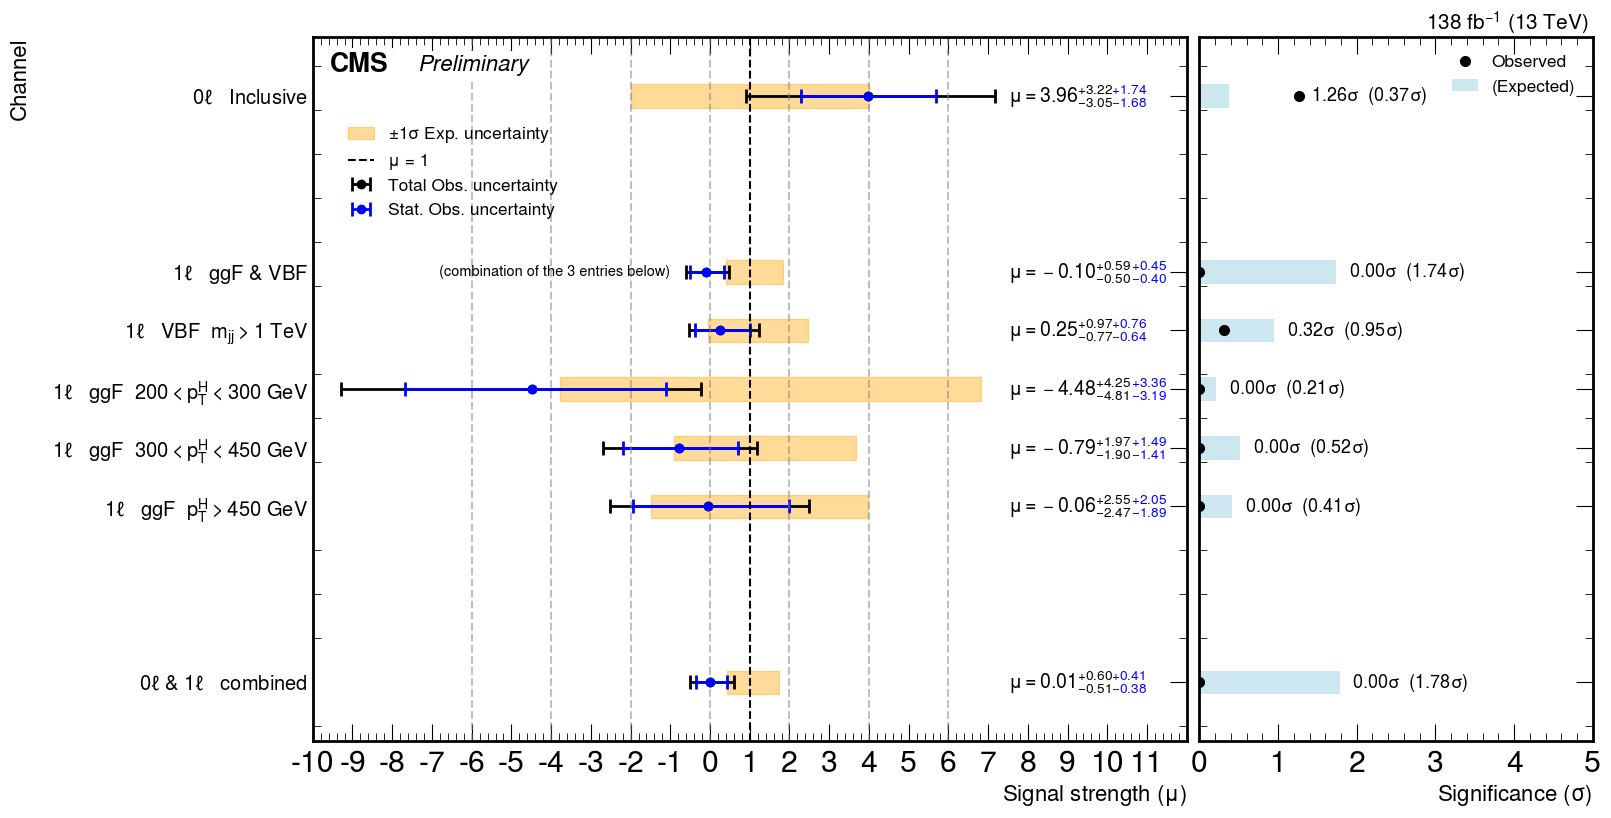

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['font.family'] = 'sans-serif'

#channels = ['0$\ell$ & 1$\ell$   combined', '1$\ell$   ggF  $p_T^H>450$ GeV', '1$\ell$   ggF  $300<p_T^H<450$ GeV', 
#            '1$\ell$   ggF  $200<p_T^H<300$ GeV', '1$\ell$   VBF  $m_{jj}>1$ TeV', '1$\ell$   ggF & VBF', 
#            '0$\ell$   Inclusive', '', '', '']

plt.rcParams['font.family'] = 'sans-serif'

# channels = ['0$\ell$ & 1$\ell$   combined',             '1$\ell$   ggF  $p_T^H>450$ GeV', '1$\ell$   ggF  $300<p_T^H<450$ GeV',             '1$\ell$   ggF  $200<p_T^H<300$ GeV', '1$\ell$   VBF  $m_{jj}>1$ TeV',             '1$\ell$   ggF & VBF', '0$\ell$   Inclusive', '', '', '']

channels = ['0$\ell$ & 1$\ell$   combined',             '1$\ell$   ggF  $p_T^H>450$ GeV', '1$\ell$   ggF  $300<p_T^H<450$ GeV',             '1$\ell$   ggF  $200<p_T^H<300$ GeV', '1$\ell$   VBF  $m_{jj}>1$ TeV',             '1$\ell$   ggF & VBF', '0$\ell$   Inclusive']
#                     [comb  , pT450 , pT300 , pT200 , VBF  , 1l   , 0l   ]

# observed_mu         = [0.011 ,  -0.060, -0.786, -4.477, 0.253,-0.097, 3.964,   100, 100, 100]
# observed_upper_total= [0.598 ,  2.547 , 1.974 , 4.249 , 0.971, 0.586, 3.218,     0,   0,   0]
# observed_lower_total= [0.513 ,  2.469 , 1.897 , 4.809 , 0.770, 0.497, 3.054,     0,   0,   0]
# observed_upper_stat = [0.409 ,  2.047 , 1.486 , 3.36  , 0.757, 0.447, 1.735,     0,   0,   0]
# observed_lower_stat = [0.375 ,  1.886 , 1.410 , 3.19  , 0.637, 0.398, 1.684,     0,   0,   0]
# expected_upper      = [0.742 ,  2.966 , 2.673 , 5.821 , 1.476, 0.841, 3.001,     0,   0,   0]
# expected_lower      = [0.570 ,  2.497 , 1.905 , 4.783 , 1.044, 0.605, 2.990,     0,   0,   0]
# expected_sig        = [1.781 ,  0.4138, 0.5199 , 0.212 , 0.954, 1.742, 0.37,     0,   0,   0]
# observed_sig        = [0.00  ,  0.0   , 0.0    , 0.0   , 0.317, 0.00 , 1.26,    10,  10,  10]

observed_mu         = [0.011 ,  -0.060, -0.786, -4.477, 0.253,-0.097, 3.964]
observed_upper_total= [0.598 ,  2.547 , 1.974 , 4.249 , 0.971, 0.586, 3.218]
observed_lower_total= [0.513 ,  2.469 , 1.897 , 4.809 , 0.770, 0.497, 3.054]
observed_upper_stat = [0.409 ,  2.047 , 1.486 , 3.36  , 0.757, 0.447, 1.735]
observed_lower_stat = [0.375 ,  1.886 , 1.410 , 3.19  , 0.637, 0.398, 1.684]
expected_upper      = [0.742 ,  2.966 , 2.673 , 5.821 , 1.476, 0.841, 3.001]
expected_lower      = [0.570 ,  2.497 , 1.905 , 4.783 , 1.044, 0.605, 2.990]
expected_sig        = [1.781 ,  0.4138, 0.5199 , 0.212 , 0.954, 1.742, 0.37]
observed_sig        = [0.00  ,  0.0   , 0.0    , 0.0   , 0.317, 0.00 , 1.26]


# Manually tuned y positions for each entry including three empty entries after 0l

# y_pos = np.array([
#      0,   # Combined
#      3,   # ggF >450 GeV
#      4,   # ggF 300-450 GeV
#      5,   # ggF 200-300 GeV
#      6,   # VBF
#      7,   # 1l
#     10,  # 0l
#     11,  # Empty entry 1
#     12,  # Empty entry 2
#     13   # Empty entry 3
# ])

y_pos = np.array([
     0,   # Combined
     3,   # ggF >450 GeV
     4,   # ggF 300-450 GeV
     5,   # ggF 200-300 GeV
     6,   # VBF
     7,   # 1l
    10,  # 0l
])

band_thickness = 0.4

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 0.9], 'wspace': 0.02}, sharey=True)

for i in range(7):
    ax.fill_betweenx(
        [y_pos[i] - band_thickness / 2, y_pos[i] + band_thickness / 2],
        1 - expected_lower[i], 1 + expected_upper[i],
        color='orange', alpha=0.4,
        label='$\pm1\sigma$ Exp. uncertainty' if i == 0 else ""
    )

xerr_total = np.array([observed_lower_total, observed_upper_total])
ax.errorbar(
    observed_mu, y_pos, xerr=xerr_total,
    fmt='o', color='black', capsize=5, capthick=2, elinewidth=2,
    label='Total Obs. uncertainty'
)

xerr_stat = np.array([observed_lower_stat, observed_upper_stat])
ax.errorbar(
    observed_mu, y_pos, xerr=xerr_stat,
    fmt='o', color='blue', capsize=5, capthick=2, elinewidth=2,
    label='Stat. Obs. uncertainty'
)

ax.axvline(x=1, color='black', linestyle='--', label='μ = 1')
for x in [-6, -4, -2, 0, 2, 4, 6]:
    ax.axvline(x=x, color='gray', linestyle='--', alpha=0.5)

for i in range(7):
    text_total = r"$\mu = {:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$".format(
        observed_mu[i], observed_upper_total[i], observed_lower_total[i]
    )
    text_stat = r"$^{{+{:.2f}}}_{{-{:.2f}}}$".format(
        observed_upper_stat[i], observed_lower_stat[i]
    )
    ax.text(7.5, y_pos[i], text_total, va='center', ha='left', fontsize=14)
    ax.text(len(text_total) / 2 - 3.9, y_pos[i], text_stat, va='center', ha='left', fontsize=14, color='blue')

ax.set_xlabel('Signal strength ($\\mu$)', fontsize=16)
ax.set_ylabel('Channel', fontsize=16, labelpad=15)
ax.set_yticks(y_pos)
ax.yaxis.set_tick_params(left=False)
ax.set_yticklabels(channels, fontsize=14.5)
ax.set_xlim(-10, 12)
ax.set_xticks(np.arange(-10, 12, 1))

ax.text(0.02, 0.96, 'CMS', transform=ax.transAxes, ha='left', va='center', fontsize=19, 
        fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
ax.text(0.12, 0.96, 'Preliminary', transform=ax.transAxes, ha='left', va='center', 
        fontsize=16, fontstyle='italic', bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
ax.text(1.46, 1.00, r'138 fb$^{-1}$ (13 TeV)', transform=ax.transAxes, ha='right', 
        va='bottom', fontsize=15)
ax.legend(loc='best', frameon=False, fontsize=12.5, bbox_to_anchor=(0.3, 0.90))

ax.text(-1., y_pos[5], "(combination of the 3 entries below)", va='center', ha='right', fontsize=10.5, color='black')

for i in range(len(expected_sig)):
    ax2.barh(y_pos[i], expected_sig[i], height=band_thickness, color='lightblue', alpha=0.6, 
             align='center', label='(Expected)' if i == 0 else "")
    ax2.plot(observed_sig[i], y_pos[i], 'ko', markersize=7, label='Observed' if i == 0 else "")
    ax2.text(max(observed_sig[i], expected_sig[i]) + 0.1, y_pos[i], 
             r" %.2f$\sigma$  (%.2f$\sigma$)" %(observed_sig[i], expected_sig[i]), 
             va='center', ha='left', fontsize=13)

ax2.set_xlabel('Significance ($\sigma$)', fontsize=16)
ax2.set_xlim(0, 4)
ax2.set_xticks(np.arange(0, 6, 1))
ax2.yaxis.set_tick_params(left=False)
ax2.set_ylim(-1, y_pos[-1] + 1)
# ax2.legend(loc='upper right', frameon=False, fontsize=12.5)
ax2.legend(loc='best', frameon=False, fontsize=12.5)

plt.subplots_adjust(left=0.19, right=0.99, top=0.96, bottom=0.08)


# plt.savefig('signal_strength_plot_0l_1l.png')
# os.system('display signal_strength_plot_0l_1l.png &')
plt.savefig('signal_strength_plot_0l_1l.pdf',bbox_inches='tight')
